In [1]:

import numpy as np
import pandas as pd
import os
from gensim.models.fasttext import load_facebook_vectors

In [2]:
model=load_facebook_vectors('cc.am.300.bin' )

In [5]:
temp=[]
data=model.get_vector('ልብስህን አዉልቅ')
data1=model.get_vector('ልብስህን')
temp.append(data)
temp.append(data1)
print(temp)

[array([-1.81118993e-03,  7.79280264e-04, -6.23612292e-03, -3.34461976e-04,
       -1.09767541e-02, -7.14224670e-03, -2.13351962e-03, -1.12489925e-03,
       -3.17258085e-03, -7.63699412e-03,  1.25899846e-02,  1.90587563e-03,
       -1.54074151e-02,  4.03520651e-03,  4.10156418e-03, -2.58936314e-03,
        2.35505844e-03, -2.55051279e-03, -5.52234659e-03, -3.78509169e-04,
       -8.83552991e-03, -2.37476733e-03, -3.81460437e-03,  2.07193848e-03,
       -2.23915861e-03, -3.21432762e-03, -3.12923221e-03, -1.73295813e-03,
        2.83179176e-03, -4.19369579e-04,  5.32812765e-03,  2.06366275e-03,
       -8.72170925e-03, -4.05250490e-03,  6.36878947e-04,  2.23774556e-03,
       -1.88035227e-03,  2.20869877e-03,  2.84386845e-03,  2.48472113e-03,
       -5.40180225e-03, -6.74514519e-03,  3.60771455e-03, -1.40152127e-03,
        1.58234185e-03,  3.18479328e-03, -7.83391763e-03,  1.72951538e-03,
       -1.39292306e-03, -7.77878426e-03, -1.04014203e-02,  6.28354261e-03,
       -3.55076813e-03, 

In [6]:
print(model.most_similar('የሚረዳኝን'))

[('የሚረዳቸዉን', 0.8854570984840393), ('የሚረዳበት', 0.8447672128677368), ('ድረአምባ', 0.7956734299659729), ('የሚረዳህ', 0.7785784006118774), ('የሚረዱንን', 0.7768847346305847), ('MāoriRomânăSetswanashqipeSlovenčinaSlovenščinasuomiSvenskaTiếng', 0.7725111246109009), ('አያስወግደውም', 0.7666252851486206), ('መድቦና', 0.766274631023407), ('PortuguêsРусскийEnglishEspañolМакедонскиTibetanภาษา', 0.7620896100997925), ('MelayubosanskicatalàČeštinaCymraegdanskDeutschEestiEnglishEspañolEuskaraFilipinofrançaisGaeilgeGàidhliggalegoHrvatskiIgboisiXhosaisiZuluíslenskaItalianoKinyarwandaKiswahiliLatviešuLëtzebuergeschLietuviųMagyarMaltiNederlandsNorsk', 0.758207380771637)]


In [171]:
dataset=pd.read_excel('C:/Users/getam/OneDrive/Desktop/dataset.xlsx')
from sklearn.utils import shuffle
dataset = shuffle(dataset)
print(dataset.head(10))
print(dataset.shape)

     Idiomatic expression   class
259          አባቶቻችን ሰልጥነዋል      1
778              ለምለም እንጀራ      1
1017               ሌባ ሚዛን       0
296          ከምታበላሽ ተርፋለች       1
1141               ሙርጥ አወጣ      0
818              ሀፍረት ለበሰ       0
86            ኦርቶዶክስ ተዋህዶ       1
1018                ሌባ ሻይ       0
677              ወፍራም አንጀት      1
853                ልቡ ቀዘቀዘ      0
(1860, 2)


In [261]:

dataframe=dataset.iloc[:,0]
label=dataset.iloc[:,1]
X_train=dataframe.iloc[0:1488]
X_val=dataframe.iloc[1488:1656]
X_test=dataframe.iloc[1656:1681]
y_train=label.iloc[0:1488]
y_val=label.iloc[1488:1656]
y_test=label.iloc[1656:1681]
matrics_train=X_train.values
matrics_test=X_test.values
matrics_val=X_val.values

In [57]:
print(X_train.shape)

(1488,)


In [262]:
embedding_matrix_train = np.zeros((len(matrics_train), 300))
embedding_matrix_test=np.zeros((len(matrics_test),300))
embedding_matrix_val=np.zeros((len(matrics_val),300))

In [263]:
i=-1
for line in matrics_train:
    i=i+1
    embedding_vector_train=model.get_vector(line)
    embedding_matrix_train[i]=embedding_vector_train
              

In [264]:
j=-1
for line in matrics_test:
    j=j+1
    embedding_vector_test=model.get_vector(line)
    embedding_matrix_test[j]=embedding_vector_test

In [266]:
k=-1
for line in matrics_val:
    k=k+1
    embedding_vector=model.get_vector(line)
    embedding_matrix_val[k]=embedding_vector

In [13]:
print(embedding_matrix_test)

[[ 4.51819564e-04  3.31791030e-04  1.75350477e-04 ... -4.94621927e-04
   4.42708479e-05 -1.89799859e-04]
 [-2.83250888e-03  1.08291744e-03 -3.42281815e-03 ... -2.62094848e-03
   8.47933989e-04  2.75264680e-03]
 [-1.72832166e-03  6.24680193e-04 -3.87457525e-03 ... -1.39777258e-04
  -5.08966332e-05  9.18569451e-04]
 ...
 [ 1.40301257e-04 -5.85234084e-04 -5.07029064e-04 ... -5.64215821e-04
   2.96627695e-04 -1.17974610e-04]
 [ 1.83772831e-03  2.60532688e-04 -1.25871284e-03 ...  1.10924174e-03
  -1.37933006e-03 -5.53697988e-04]
 [-5.07918047e-03  8.77097773e-04 -1.19822705e-02 ... -9.25204530e-03
  -3.58922320e-04  9.32208914e-03]]


In [14]:
print(embedding_matrix_test.shape)
print(embedding_matrix_train.shape)

(372, 300)
(1488, 300)


In [15]:
print(y_train.shape)

(1488,)


In [17]:
import tensorflow as tf
import keras

In [18]:
from keras.models import Sequential

In [19]:
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation, Flatten

In [384]:
deep=Sequential()
deep.add(Dense(256, input_dim=300,activation='relu'))
deep.add(Dense(8,activation='relu'))
#deep.add(Dense(4,activation='softmax'))
#deep.add(Dropout(0.5))
deep.add(Dense(1, activation='sigmoid'))
deep.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
deep.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 256)               77056     
_________________________________________________________________
dense_144 (Dense)            (None, 8)                 2056      
_________________________________________________________________
dense_145 (Dense)            (None, 1)                 9         
Total params: 79,121
Trainable params: 79,121
Non-trainable params: 0
_________________________________________________________________


In [392]:
history=deep.fit(embedding_matrix_train, y_train, batch_size=4, epochs=100,verbose=2,validation_data=(embedding_matrix_val,y_val))

Train on 1488 samples, validate on 168 samples
Epoch 1/100
 - 1s - loss: 0.3395 - accuracy: 0.8313 - val_loss: 1.2918 - val_accuracy: 0.6310
Epoch 2/100
 - 1s - loss: 0.3278 - accuracy: 0.8401 - val_loss: 1.3209 - val_accuracy: 0.6488
Epoch 3/100
 - 1s - loss: 0.3276 - accuracy: 0.8461 - val_loss: 1.3499 - val_accuracy: 0.6250
Epoch 4/100
 - 0s - loss: 0.3082 - accuracy: 0.8582 - val_loss: 1.4328 - val_accuracy: 0.6250
Epoch 5/100
 - 0s - loss: 0.3230 - accuracy: 0.8515 - val_loss: 1.3367 - val_accuracy: 0.6429
Epoch 6/100
 - 0s - loss: 0.3057 - accuracy: 0.8528 - val_loss: 1.3587 - val_accuracy: 0.6488
Epoch 7/100
 - 0s - loss: 0.2943 - accuracy: 0.8616 - val_loss: 1.3968 - val_accuracy: 0.6369
Epoch 8/100
 - 0s - loss: 0.2969 - accuracy: 0.8636 - val_loss: 1.3983 - val_accuracy: 0.6488
Epoch 9/100
 - 0s - loss: 0.2903 - accuracy: 0.8683 - val_loss: 1.4904 - val_accuracy: 0.6310
Epoch 10/100
 - 0s - loss: 0.2899 - accuracy: 0.8710 - val_loss: 1.4152 - val_accuracy: 0.6429
Epoch 11/100

Epoch 87/100
 - 1s - loss: 0.1476 - accuracy: 0.9449 - val_loss: 2.7044 - val_accuracy: 0.6488
Epoch 88/100
 - 1s - loss: 0.1051 - accuracy: 0.9630 - val_loss: 2.6992 - val_accuracy: 0.6429
Epoch 89/100
 - 1s - loss: 0.1235 - accuracy: 0.9503 - val_loss: 2.6689 - val_accuracy: 0.6429
Epoch 90/100
 - 1s - loss: 0.1056 - accuracy: 0.9603 - val_loss: 2.7752 - val_accuracy: 0.6369
Epoch 91/100
 - 1s - loss: 0.0990 - accuracy: 0.9630 - val_loss: 2.7485 - val_accuracy: 0.6190
Epoch 92/100
 - 0s - loss: 0.1001 - accuracy: 0.9630 - val_loss: 2.7838 - val_accuracy: 0.6250
Epoch 93/100
 - 1s - loss: 0.0962 - accuracy: 0.9657 - val_loss: 2.9205 - val_accuracy: 0.6131
Epoch 94/100
 - 1s - loss: 0.1109 - accuracy: 0.9543 - val_loss: 2.8992 - val_accuracy: 0.6012
Epoch 95/100
 - 1s - loss: 0.1518 - accuracy: 0.9442 - val_loss: 2.6677 - val_accuracy: 0.6310
Epoch 96/100
 - 1s - loss: 0.0975 - accuracy: 0.9664 - val_loss: 2.8964 - val_accuracy: 0.6012
Epoch 97/100
 - 1s - loss: 0.0958 - accuracy: 0.96

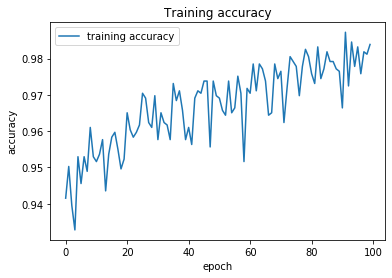

In [358]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'test'], loc='upper left')
plt.show()

In [302]:
# model evaluation 
result=deep.evaluate(embedding_matrix_test,y_test)
print(result)

25/25 [==============================] - 0s 41us/step
[0.8487358093261719, 0.800000011920929]


In [303]:
preid_lebel=deep.predict(embedding_matrix_test)
pred=preid_lebel.round()

In [299]:
print(y_test)

1441    0
1631    0
1597    0
62      1
1405    0
877     0
1842    0
130     1
1654    0
1253    0
221     1
223     1
970     0
1359    0
1043    0
671     1
958     0
1254    0
137     1
564     1
1156    0
430     1
535     1
1747    0
1103    0
Name: class, dtype: int64


In [309]:
import numpy
import sklearn.metrics
Accuracy=sklearn.metrics.accuracy_score(y_test, pred)
print(Accuracy)
precision=sklearn.metrics.precision_score(y_test, pred)
print(precision)
recall=sklearn.metrics.recall_score(y_test, pred)
print(recall)
f1_score=sklearn.metrics.f1_score(y_test, pred)
print(f1_score)


0.8
0.7
0.7777777777777778
0.7368421052631577


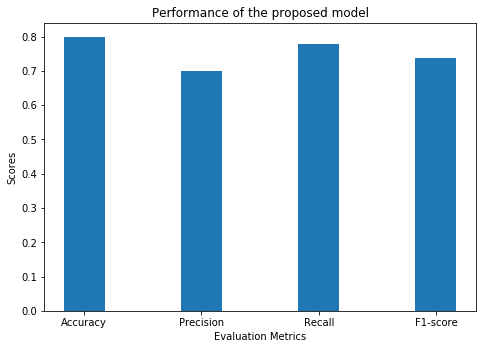

In [311]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [Accuracy,precision,recall,f1_score]
ax.bar(metrics,values,width=0.35)
ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance of the proposed model')
plt.show()

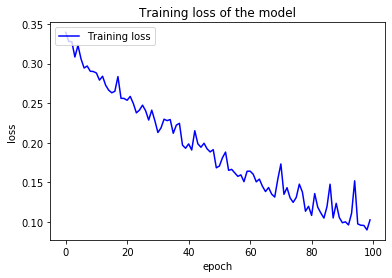

In [393]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], c='b')
#plt.plot(history.history['val_loss'],c='b')
plt.title('Training loss of the model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss'], loc='upper left')
plt.show()

In [380]:
# testing the data with testing dataset
test_acc=deep.evaluate(embedding_matrix_test,  y_test)
print(test_acc)

25/25 [==============================] - 0s 80us/step
[0.5001906752586365, 0.8399999737739563]


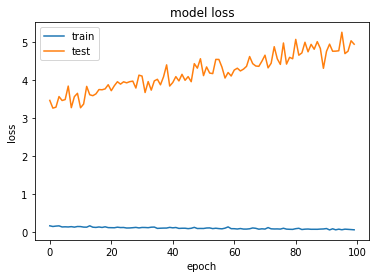

In [361]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [277]:
print(test_acc)

[1.348805974988104, 0.6699029207229614]


In [312]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2 )  
classifier.fit(embedding_matrix_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [313]:
y_pred= classifier.predict(embedding_matrix_test)  

In [314]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[14  2]
 [ 6  3]]


In [315]:
result=classifier.score(embedding_matrix_test,y_test)
print(result)

0.68


In [316]:
# random Foresset
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 

In [317]:
clf.fit(embedding_matrix_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [318]:
y_pred=clf.predict(embedding_matrix_test)

In [319]:
result=clf.score(embedding_matrix_test,y_test)
print(y_pred)

[0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1]


In [221]:
print(y_test.to_string())

1441    0
1631    0
1597    0
62      1
1405    0
877     0
1842    0
130     1
1654    0
1253    0
221     1
223     1
970     0
1359    0
1043    0
671     1
958     0
1254    0
137     1
564     1
1156    0
430     1
535     1
1747    0
1103    0


In [320]:
print(result)

0.72


In [354]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(embedding_matrix_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [350]:
y_pred = svclassifier.predict(embedding_matrix_test)

In [356]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [355]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16  0]
 [ 8  1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        16
           1       1.00      0.11      0.20         9

    accuracy                           0.68        25
   macro avg       0.83      0.56      0.50        25
weighted avg       0.79      0.68      0.58        25



In [357]:
ac=svclassifier.score(embedding_matrix_test,y_test)
print(ac)

0.8
